## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None) #show all columns
df=data.copy()#make a copy for the loaded data, to be used in the analysis
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# check the Senior Citizen column, changing 0 to No, and 1 to Yes

In [3]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [4]:
df.SeniorCitizen=df.SeniorCitizen.map({0:'No',1:'Yes'})

## get information on the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### there isn't missing dataframe in the dataset but it should be noted that the TotalCharges column should hold float datatype. Further examination made it known that it was due to some missing values inputted as ' '(white space)

## Let's check data with whitespace on the TotalCharges column

In [6]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### it appears they are all new customers all having a tenure of 0

## replace ' ' (whitespace) with 0 and convert to datatype float

In [7]:
df['TotalCharges']=df['TotalCharges'].str.replace(' ','0').astype('float64')

## check the information of the dataframe again

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### The change has taken effect

## Get amount of customer that churn

In [9]:
churn_count=df['Churn'].value_counts()
churn_count

No     5174
Yes    1869
Name: Churn, dtype: int64

## Visualize it 

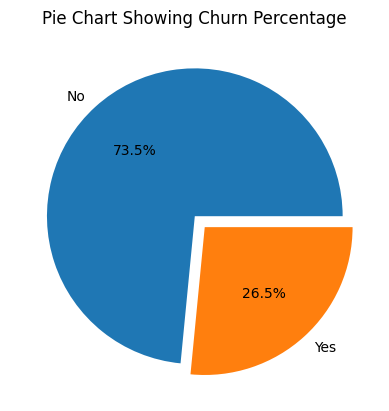

In [10]:
plt.pie(x=churn_count,labels=churn_count.index,explode=[0,0.1], autopct='%.1f%%')
plt.title('Pie Chart Showing Churn Percentage')
plt.show()

## This shows that Telco has lost 1869 customers amounting to 26.5% of their total customers

## Let's check the variation of churn by some categorical column. but let's first of all get the relevant columns

In [11]:
relevant_columns=[i for i in df.columns if df[i].dtype=='O' and i not in ['customerID','Churn']]
relevant_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

## Visualize it for easier interpretation

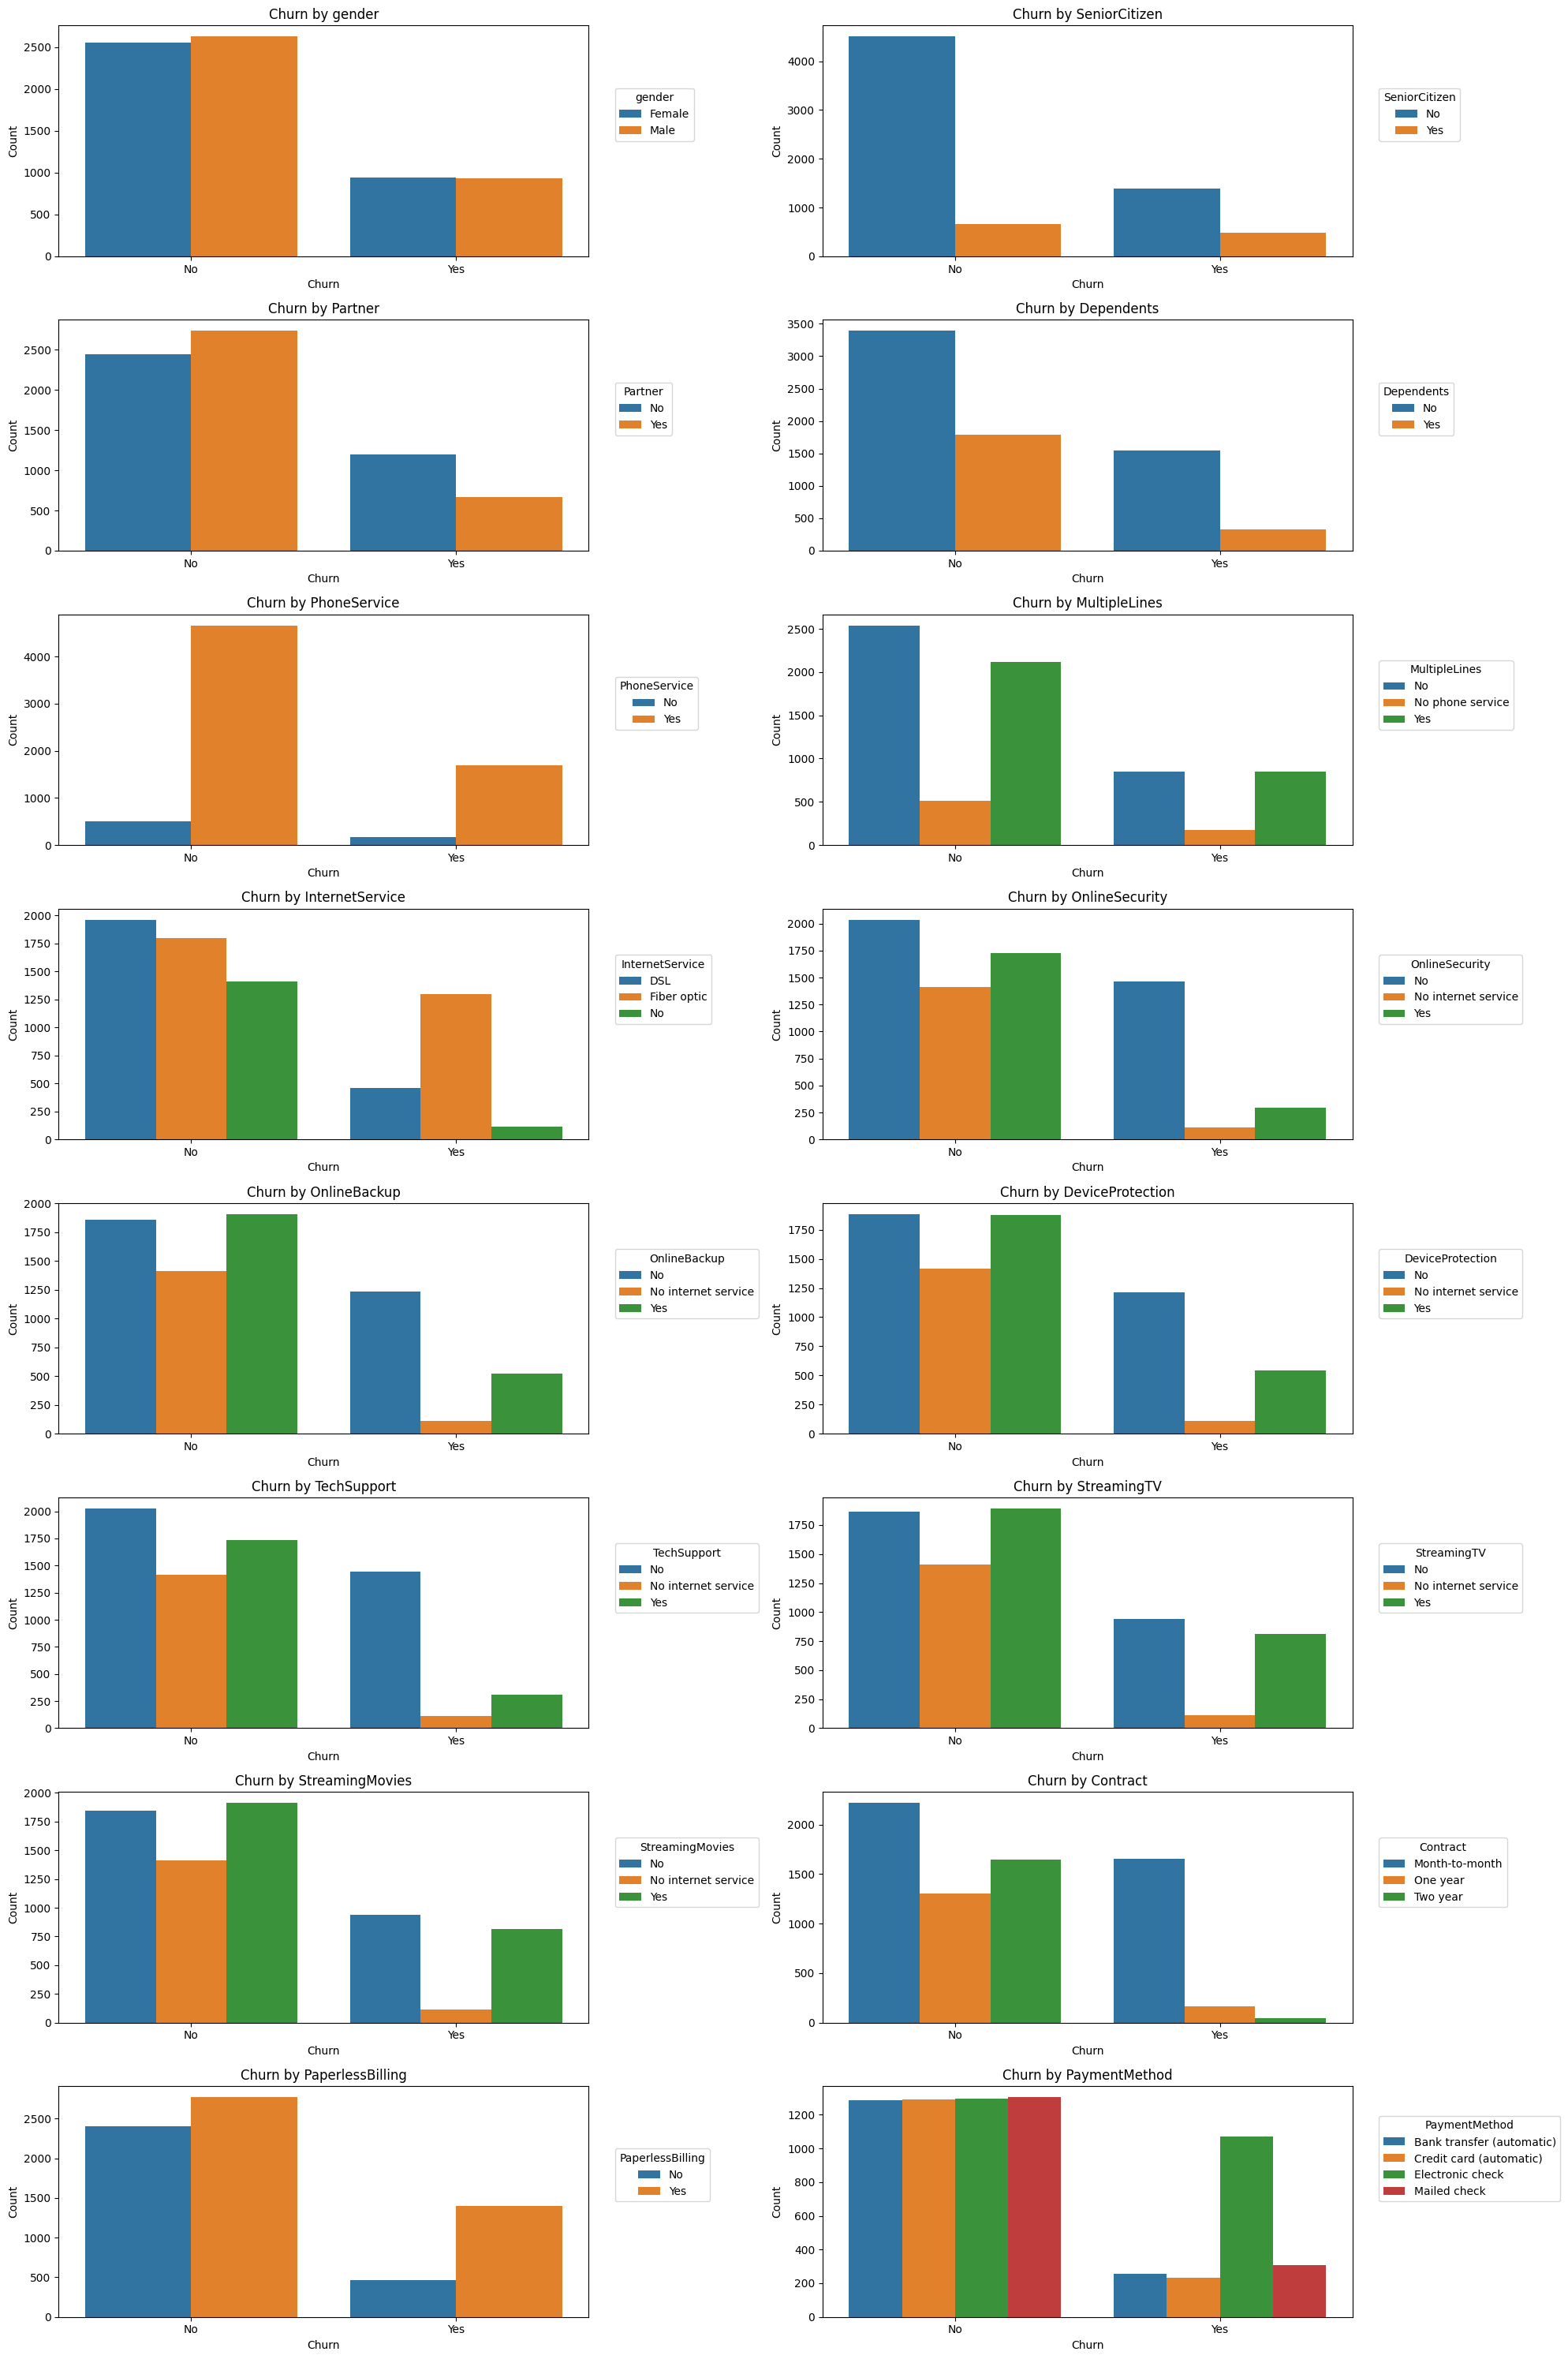

In [12]:
fig,ax=plt.subplots(nrows=8,ncols=2,figsize=(20,30))


for i, column in enumerate(relevant_columns):
    data=df.groupby([column,'Churn']).size().reset_index(name='Count')
    row=i//2
    col=i%2
    sns.barplot(data=data,x='Churn',y='Count',hue=column,ax=ax[row][col])
    ax[row][col].set_title(f'Churn by {column}')
    ax[row][col].legend(title=column,loc=(1.05,0.5))
    
plt.tight_layout()
plt.show()

### From the visualization It can be deduced that:
* Customer's gender has almost same effect on if they churn
* Customers that are not senior citizens churned more
* Customers without partner churned more
* Customers with no dependents churned more
* Customers that uses phone service churned more
* Customers using and not using Multiple Lines are more likely to churn than customers with no phone services
* Customers that adopt internet service "Optic Fibre" churned more
* Customers without Online Security, Online Backup, Device Protection, Tech support churned more
* Customers streaming or not streaming TV, and Movie are more likely to churn than customers with no phone services
* Customers with month-to-month contract churned more
* Customers with paperless billing churned more
* Customers that adopt the use of the payment method "Electronic check" churned 

###### But this is not enough to draw any conclusions, let's examine further

## Explore Gender

In [13]:
gender=df.groupby(['gender','Churn']).size().reset_index(name='Count')
gender

,gender,Churn,Count
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


## Visualize

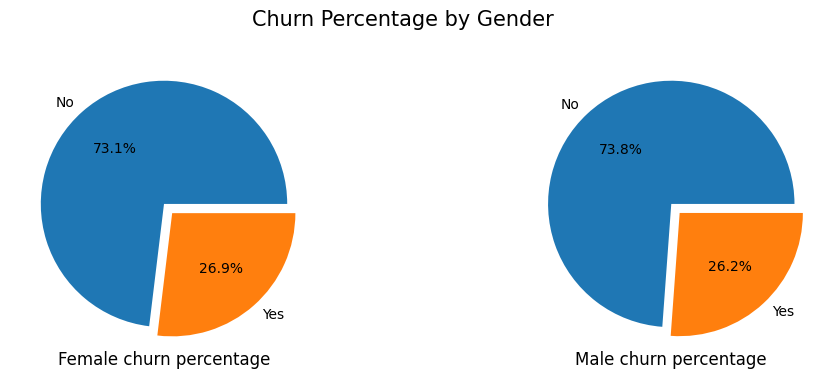

In [14]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(12,4))

for i,sex in enumerate(gender['gender'].unique()):
    sub=gender[gender['gender']==sex]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    ax[i].set_title(f'{sex} churn percentage',y=-0.05)
    
plt.suptitle('Churn Percentage by Gender',size=15)
plt.show()

#### The percentage that churned from both gender are the same, therefore gender isn't affecting why our customers are churning

## Explore Senior Citizens

In [15]:
senior_citizen=df.groupby(['SeniorCitizen','Churn']).size().reset_index(name='Count')
senior_citizen

,SeniorCitizen,Churn,Count
0,No,No,4508
1,No,Yes,1393
2,Yes,No,666
3,Yes,Yes,476


## Visualize

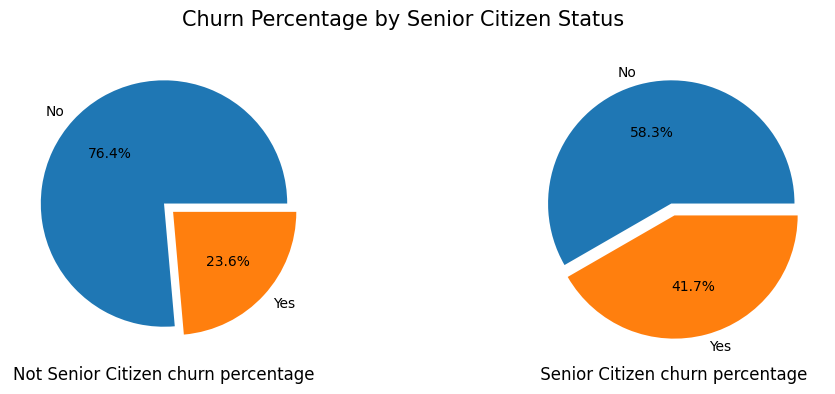

In [16]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(12,4))

for i,status in enumerate(senior_citizen['SeniorCitizen'].unique()):
    sub=senior_citizen[senior_citizen['SeniorCitizen']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f' Senior Citizen churn percentage',y=-0.1)
    else:
        ax[i].set_title(f'Not Senior Citizen churn percentage',y=-0.1)
        
    
plt.suptitle('Churn Percentage by Senior Citizen Status',size=15)
plt.show()

## Calculate effect of both category churn on the total customers

In [17]:
senior_churn=senior_citizen[(senior_citizen['SeniorCitizen']=='Yes') & (senior_citizen['Churn']=='Yes')].Count.item()
not_senior_churn=senior_citizen[(senior_citizen['SeniorCitizen']=='No') & (senior_citizen['Churn']=='Yes')].Count.item()
total=senior_citizen.Count.sum()
print(f'{senior_churn} Senior Citizen churned. Equivalent to {round(100*senior_churn/total,2)}% of our total customers')
print(f'{not_senior_churn} Non Senior Citizen churned. Equivalent to {round(100*not_senior_churn/total,2)}% of our total customers')

476 Senior Citizen churned. Equivalent to 6.76% of our total customers
1393 Non Senior Citizen churned. Equivalent to 19.78% of our total customers


#### The percentage of senior citizen that churned is higher compared to those that are not senior citizen. Though we have less customers that are senior citizens but this shows that our service is not satisfactory to the senior citizens which is the reason for their high churn percentage. Also, 476 Senior Citizen churned, amounting to 6.76% of our total customers and 1393 Non Senior Citizen churned amounting to 19.78% of our total customers. However, the Non Senior Citizens are a major of our total customers, and we are also loosing them in a high rate.

## Explore Partner 

In [18]:
partner=df.groupby(['Partner','Churn']).size().reset_index(name='Count')
partner

,Partner,Churn,Count
0,No,No,2441
1,No,Yes,1200
2,Yes,No,2733
3,Yes,Yes,669


## Visualize

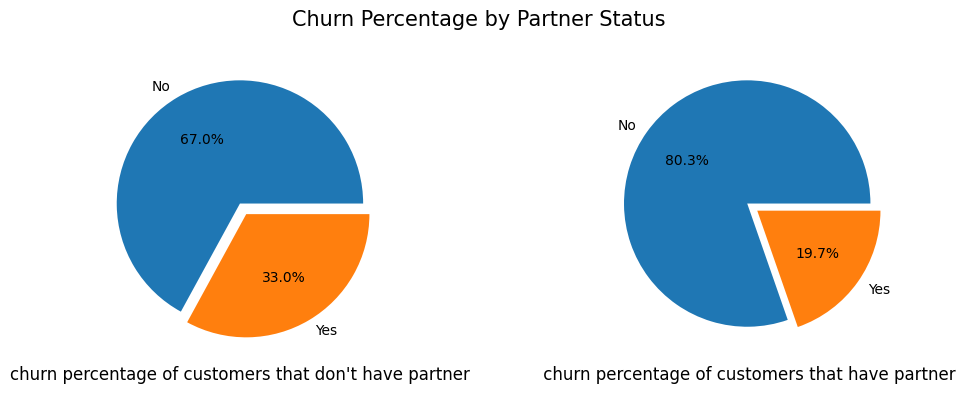

In [19]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(12,4))

for i,status in enumerate(partner['Partner'].unique()):
    sub=partner[partner['Partner']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f' churn percentage of customers that have partner',y=-0.1)
    else:
        ax[i].set_title(f'churn percentage of customers that don\'t have partner',y=-0.1)
        
    
plt.suptitle('Churn Percentage by Partner Status',size=15)
plt.show()

## Calculate the effect of both categories on the total customers

In [20]:
has_partner=partner[(partner['Partner']=='Yes') & (partner['Churn']=='Yes')].Count.item()
no_partner=partner[(partner['Partner']=='No') & (partner['Churn']=='Yes')].Count.item()
total=partner.Count.sum()
print(f'{has_partner} Customers with partner churned. Equivalent to {round(100*has_partner/total,2)}% of our total customers')
print(f'{no_partner} Customers without partner churned. Equivalent to {round(100*no_partner/total,2)}% of our total customers')

669 Customers with partner churned. Equivalent to 9.5% of our total customers
1200 Customers without partner churned. Equivalent to 17.04% of our total customers


#### Customers without partner are more likely to churn. Following the fact that they have a higher churn percentage among their population compare to customers with partner. This might be likely due to the fact that it is easier for them to do without our service than for customers that have partner

## Explore Dependents

In [21]:
dependent=df.groupby(['Dependents','Churn']).size().reset_index(name='Count')
dependent

,Dependents,Churn,Count
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1784
3,Yes,Yes,326


## Visualize

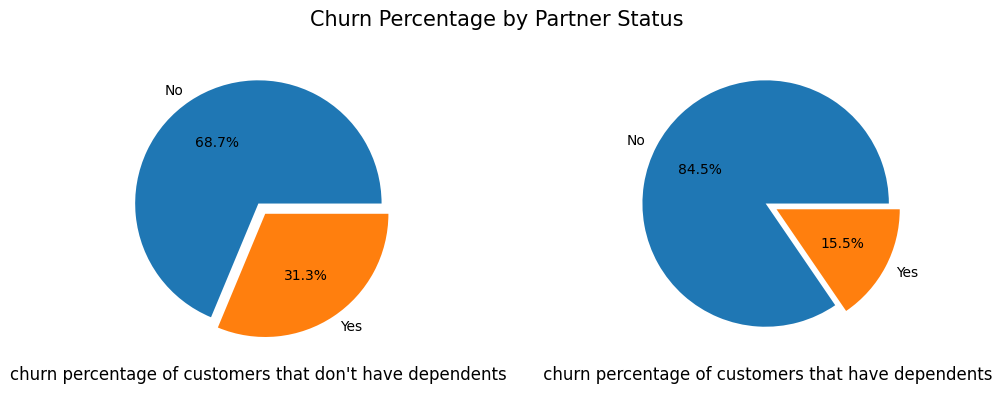

In [22]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(12,4))

for i,status in enumerate(dependent['Dependents'].unique()):
    sub=dependent[dependent['Dependents']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f' churn percentage of customers that have dependents',y=-0.1)
    else:
        ax[i].set_title(f'churn percentage of customers that don\'t have dependents',y=-0.1)
        
    
plt.suptitle('Churn Percentage by Partner Status',size=15)
plt.show()

In [23]:
has_dependent=dependent[(dependent['Dependents']=='Yes') & (dependent['Churn']=='Yes')].Count.item()
no_dependent=dependent[(dependent['Dependents']=='No') & (dependent['Churn']=='Yes')].Count.item()
total=dependent.Count.sum()
print(f'{has_dependent} Customers with dependents churned. Equivalent to {round(100*has_dependent/total,2)}% of our total customers')
print(f'{no_dependent} Customers without dependents churned. Equivalent to {round(100*no_dependent/total,2)}% of our total customers')

326 Customers with dependents churned. Equivalent to 4.63% of our total customers
1543 Customers without dependents churned. Equivalent to 21.91% of our total customers


#### Customers without dependents are more likely to churn. Following the fact that they have a higher churn percentage among their population compare to customers with dependent. This might also be likely due to the fact that it is easier for them to do without our service than for customers that have dependents

## Explore Phone Service

In [24]:
phone=df.groupby(['PhoneService','Churn']).size().reset_index(name='Count')
phone

,PhoneService,Churn,Count
0,No,No,512
1,No,Yes,170
2,Yes,No,4662
3,Yes,Yes,1699


## Visualize

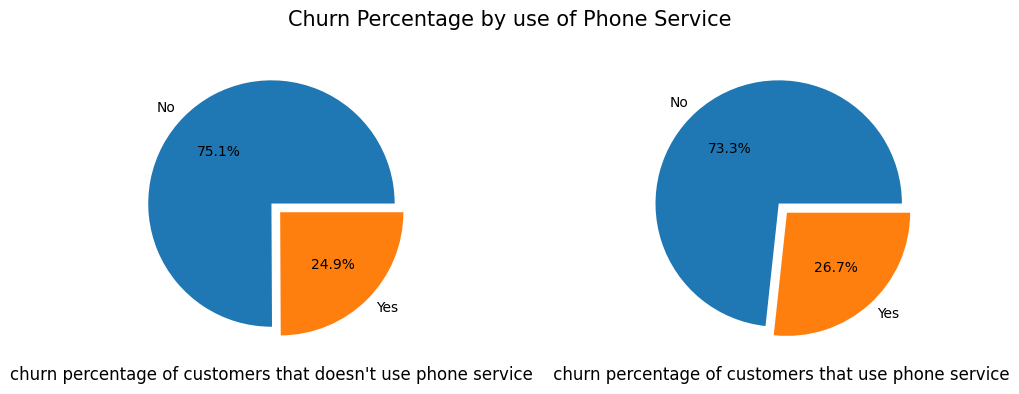

In [25]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(12,4))

for i,status in enumerate(phone['PhoneService'].unique()):
    sub=phone[phone['PhoneService']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f' churn percentage of customers that use phone service',y=-0.1)
    else:
        ax[i].set_title(f'churn percentage of customers that doesn\'t use phone service',y=-0.1)
        
    
plt.suptitle('Churn Percentage by use of Phone Service',size=15)
plt.show()

In [26]:
use_phone=phone[(phone['PhoneService']=='Yes') & (phone['Churn']=='Yes')].Count.item()
no_phone=phone[(phone['PhoneService']=='No') & (phone['Churn']=='Yes')].Count.item()
total=phone.Count.sum()
print(f'{use_phone} Customers that use phone service churned. Equivalent to {round(100*use_phone/total,2)}% of our total customers')
print(f'{no_phone} Customers that don\'t use phone service churned. Equivalent to {round(100*no_phone/total,2)}% of our total customers')

1699 Customers that use phone service churned. Equivalent to 24.12% of our total customers
170 Customers that don't use phone service churned. Equivalent to 2.41% of our total customers


#### Churn percentage of both categories of customers are similar. Also, it should be noted that customers that make use of phone service had more effect on our customer churn. This is because majority of our customers makes use of phone service

## Explore Multiple Line

In [27]:
multiline=df.groupby(['MultipleLines','Churn']).size().reset_index(name='Count')
multiline

,MultipleLines,Churn,Count
0,No,No,2541
1,No,Yes,849
2,No phone service,No,512
3,No phone service,Yes,170
4,Yes,No,2121
5,Yes,Yes,850


#### from the table, it is seen that customers that doesn't make use of phone service don't have multiple lines has the values was same as that of phone table

## Visualize

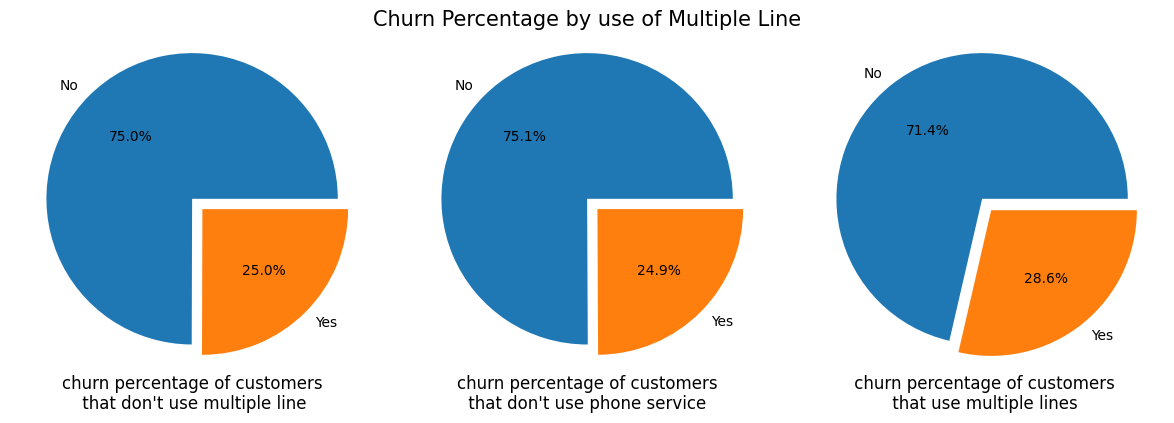

In [28]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

for i,status in enumerate(multiline['MultipleLines'].unique()):
    sub=multiline[multiline['MultipleLines']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f' churn percentage of customers\n that use multiple lines',y=-0.1)
    elif status=='No':
        ax[i].set_title(f'churn percentage of customers\n that don\'t use multiple line',y=-0.1)
    else:
        ax[i].set_title(f'churn percentage of customers\n that don\'t use phone service ',y=-0.1)
        
plt.tight_layout()    
plt.suptitle('Churn Percentage by use of Multiple Line',size=15)
plt.show()

In [29]:
use_multiline=multiline[(multiline['MultipleLines']=='Yes') & (multiline['Churn']=='Yes')].Count.item()
no_multiline=multiline[(multiline['MultipleLines']=='No') & (multiline['Churn']=='Yes')].Count.item()
total=multiline.Count.sum()
print(f'{use_multiline} Customers that use multiple line churned. Equivalent to {round(100*use_multiline/total,2)}% of our total customers')
print(f'{no_multiline} Customers that don\'t use multiple line churned. Equivalent to {round(100*no_multiline/total,2)}% of our total customers')

850 Customers that use multiple line churned. Equivalent to 12.07% of our total customers
849 Customers that don't use multiple line churned. Equivalent to 12.05% of our total customers


#### Out of our 1699 Customers that use phone service, 850 customers use multiple lines while 849 customers use single line. It should be also be noted that the various churn percentage is 25% and 28.6% respectively, showing that customer churn isn't dependent on whether or not they use multiple lines


## Explore Internet Service

In [30]:
internet=df.groupby(['InternetService','Churn']).size().reset_index(name='Count')
internet

,InternetService,Churn,Count
0,DSL,No,1962
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1413
5,No,Yes,113


## Visualize

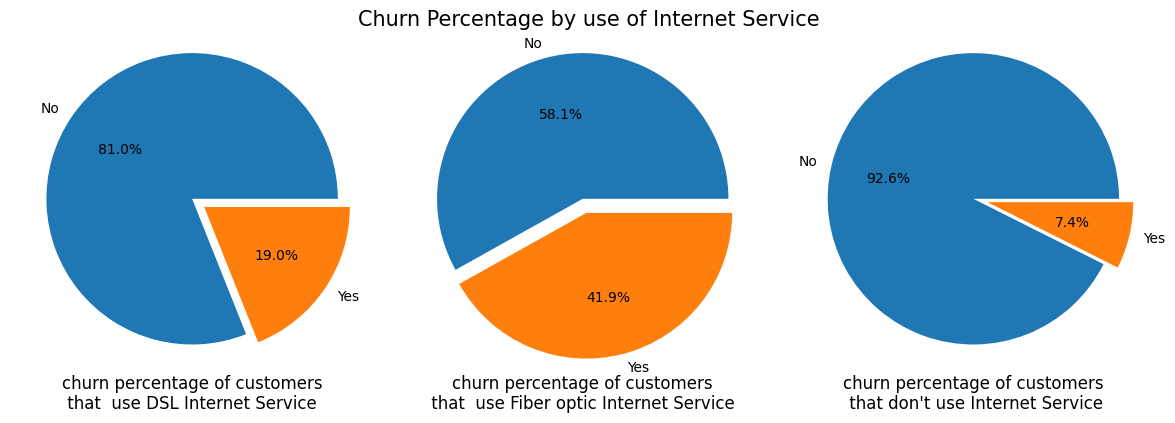

In [31]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

for i,status in enumerate(internet['InternetService'].unique()):
    sub=internet[internet['InternetService']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='No':
        ax[i].set_title(f'churn percentage of customers\n that don\'t use Internet Service',y=-0.1)
    else:
        ax[i].set_title(f'churn percentage of customers\n that  use {status} Internet Service ',y=-0.1)
        
plt.tight_layout()    
plt.suptitle('Churn Percentage by use of Internet Service',size=15)
plt.show()

In [32]:
dsl=internet[(internet['InternetService']=='DSL') & (internet['Churn']=='Yes')].Count.item()
fibre_optics=internet[(internet['InternetService']=='Fiber optic') & (internet['Churn']=='Yes')].Count.item()
no_internet=internet[(internet['InternetService']=='No') & (internet['Churn']=='Yes')].Count.item()
total=internet.Count.sum()

print(f'{dsl} Customers that use DSL Internet Service churned. Equivalent to {round(100*dsl/total,2)}% of our total customers')
print(f'{fibre_optics} Customers that use Fiber optic Internet Service churned. Equivalent to {round(100*fibre_optics/total,2)}% of our total customers')
print(f'{no_internet} Customers that don\'t use any Internet Service churned. Equivalent to {round(100*no_internet/total,2)}% of our total customers')

459 Customers that use DSL Internet Service churned. Equivalent to 6.52% of our total customers
1297 Customers that use Fiber optic Internet Service churned. Equivalent to 18.42% of our total customers
113 Customers that don't use any Internet Service churned. Equivalent to 1.6% of our total customers


<AxesSubplot:title={'center':'Internet Service Distribution'}>

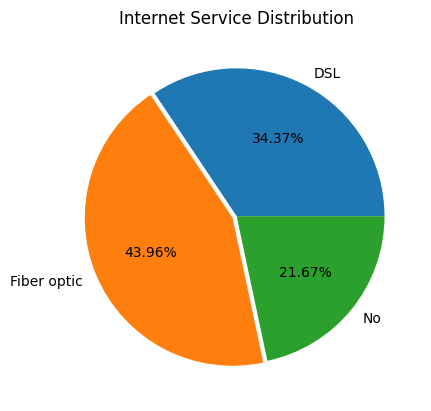

In [33]:

df.groupby(['InternetService']).size().plot(kind='pie',ylabel='',autopct='%.2f%%',title='Internet Service Distribution',
                                            explode=[0,0.03,0])

#### Customers that uses Fibre optic Internet Service are  most likely to churn. They also have a higher churn percentage in the population compared to customers that use DSL internet Service and those that don't use any internet service. It should also be noted that customers that use Fibre optic holds majority of our customers amounting to 43.96% of our total customers

## Explore online security

In [34]:
security=df.groupby(['OnlineSecurity','Churn']).size().reset_index(name='Count')
security

,OnlineSecurity,Churn,Count
0,No,No,2037
1,No,Yes,1461
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1724
5,Yes,Yes,295


#### From the table, it can be seen that customers that don't use internet service don't also don't use online security as their value is same as that of the internet table

## Visualize

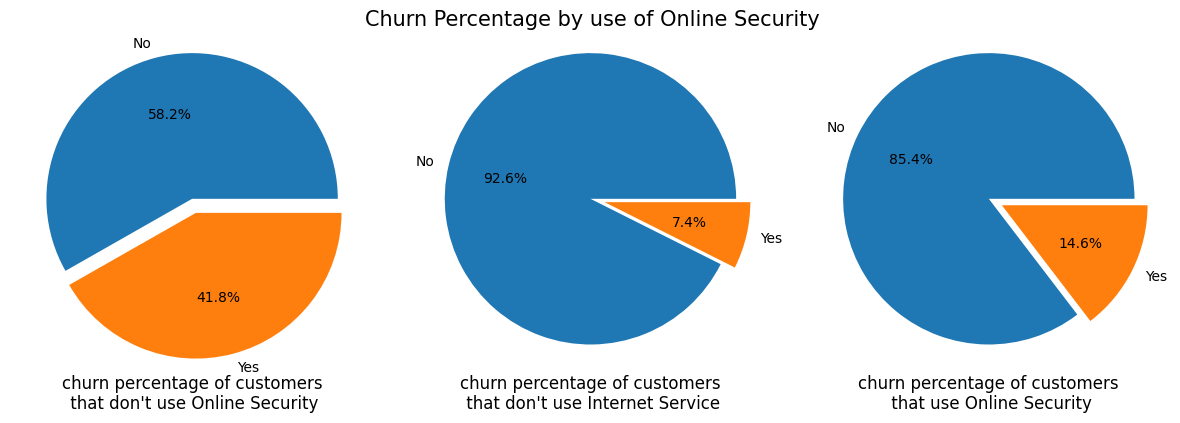

In [35]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

for i,status in enumerate(security['OnlineSecurity'].unique()):
    sub=security[security['OnlineSecurity']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f'churn percentage of customers\n that use Online Security',y=-0.1)
    elif status=='No':
        ax[i].set_title(f'churn percentage of customers\n that don\'t use Online Security',y=-0.1)
    else:
        ax[i].set_title(f'churn percentage of customers\n that don\'t use Internet Service',y=-0.1)
        
plt.tight_layout()    
plt.suptitle('Churn Percentage by use of Online Security',size=15)
plt.show()

In [36]:
use_security=security[(security['OnlineSecurity']=='Yes') & (security['Churn']=='Yes')].Count.item()
no_security=security[(security['OnlineSecurity']=='No') & (security['Churn']=='Yes')].Count.item()
total=security.Count.sum()
print(f'{use_security} Customers that use online security churned. Equivalent to {round(100*use_security/total,2)}% of our total customers')
print(f'{no_security} Customers that don\'t use online security churned. Equivalent to {round(100*no_security/total,2)}% of our total customers')

295 Customers that use online security churned. Equivalent to 4.19% of our total customers
1461 Customers that don't use online security churned. Equivalent to 20.74% of our total customers


#### customers that don't use online security had the highest churn percentage.

## Let's explore further to check if there is any relationship between the Internet Service used and online security if they don't use online security

In [37]:
unsecured_internet=df[df['OnlineSecurity']=='No'].groupby(['InternetService','Churn']).size().reset_index(name='Count')
unsecured_internet

,InternetService,Churn,Count
0,DSL,No,894
1,DSL,Yes,347
2,Fiber optic,No,1143
3,Fiber optic,Yes,1114


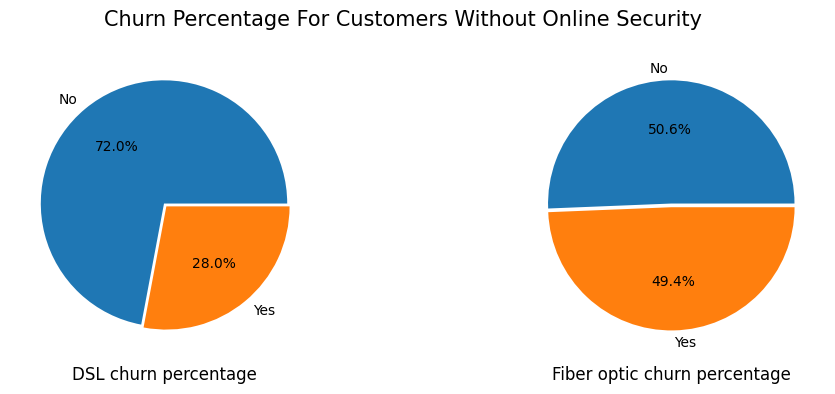

In [38]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(12,4))

for i,status in enumerate(unsecured_internet['InternetService'].unique()):
    sub=unsecured_internet[unsecured_internet['InternetService']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.03], autopct='%.1f%%')
    ax[i].set_title(f'{status} churn percentage',y=-0.1)
    
plt.suptitle('Churn Percentage For Customers Without Online Security',size=15)
plt.show()

In [39]:
use_unsecured_dsl=unsecured_internet[(unsecured_internet['InternetService']=='DSL') & \
                                     (unsecured_internet['Churn']=='Yes')].Count.item()
use_unsecured_fiber=unsecured_internet[(unsecured_internet['InternetService']=='Fiber optic') & \
                                       (unsecured_internet['Churn']=='Yes')].Count.item()
total=unsecured_internet.Count.sum()
print(f'{use_unsecured_dsl} Customers without online security that use DSL churned. Equivalent to \
{round(100*use_unsecured_dsl/total,2)}% of our total customers with no online security')
print(f'{use_unsecured_fiber} Customers without online that use Fiber optic churned. Equivalent to \
{round(100*use_unsecured_fiber/total,2)}% of our total customers with no online security')

347 Customers without online security that use DSL churned. Equivalent to 9.92% of our total customers with no online security
1114 Customers without online that use Fiber optic churned. Equivalent to 31.85% of our total customers with no online security


#### It can be seen that majority of the customers that churned due to not using online security also use Fiber optic Internet Service

## Explore Online Backup

In [40]:
backup=df.groupby(['OnlineBackup','Churn']).size().reset_index(name='Count')
backup

,OnlineBackup,Churn,Count
0,No,No,1855
1,No,Yes,1233
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1906
5,Yes,Yes,523


## Visualize

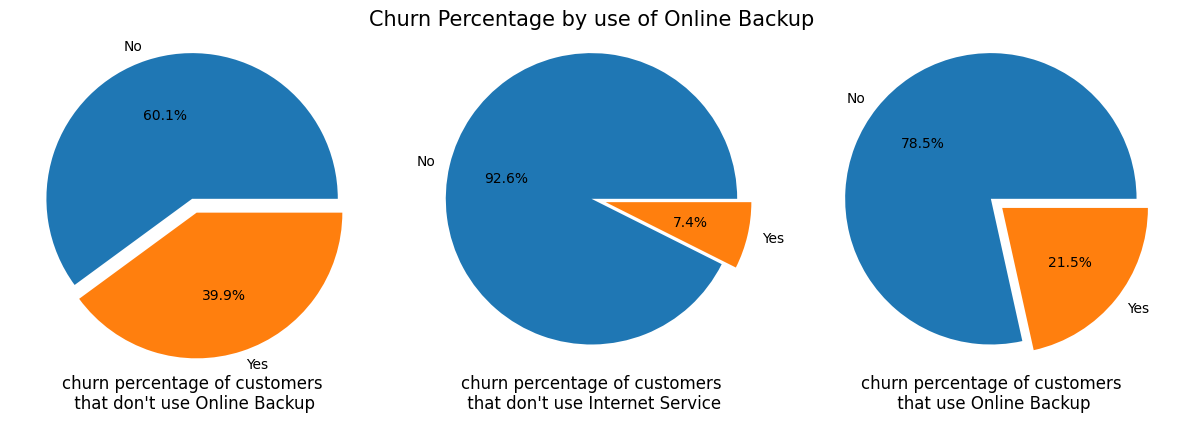

In [41]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

for i,status in enumerate(backup['OnlineBackup'].unique()):
    sub=backup[backup['OnlineBackup']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f'churn percentage of customers\n that use Online Backup',y=-0.1)
    elif status=='No':
        ax[i].set_title(f'churn percentage of customers\n that don\'t use Online Backup',y=-0.1)
    else:
        ax[i].set_title(f'churn percentage of customers\n that don\'t use Internet Service',y=-0.1)
        
plt.tight_layout()    
plt.suptitle('Churn Percentage by use of Online Backup',size=15)
plt.show()

In [42]:
use_backup=backup[(backup['OnlineBackup']=='Yes') & (backup['Churn']=='Yes')].Count.item()
no_backup=backup[(backup['OnlineBackup']=='No') & (backup['Churn']=='Yes')].Count.item()
total=backup.Count.sum()
print(f'{use_backup} Customers that use online security churned. Equivalent to {round(100*use_backup/total,2)}% of our total customers')
print(f'{no_backup} Customers that don\'t use online security churned. Equivalent to {round(100*no_backup/total,2)}% of our total customers')

523 Customers that use online security churned. Equivalent to 7.43% of our total customers
1233 Customers that don't use online security churned. Equivalent to 17.51% of our total customers


#### customers that don't use online backup had the highest churn percentage.

## Let's explore further to check if there is any relationship between the Internet Service used and online backup if they don't use online backup

In [43]:
unbacked_internet=df[df['OnlineBackup']=='No'].groupby(['InternetService','Churn']).size().reset_index(name='Count')
unbacked_internet

,InternetService,Churn,Count
0,DSL,No,992
1,DSL,Yes,343
2,Fiber optic,No,863
3,Fiber optic,Yes,890


In [44]:
use_unbacked_dsl=unbacked_internet[(unbacked_internet['InternetService']=='DSL') & \
                                     (unbacked_internet['Churn']=='Yes')].Count.item()
use_unbacked_fiber=unbacked_internet[(unbacked_internet['InternetService']=='Fiber optic') & \
                                       (unbacked_internet['Churn']=='Yes')].Count.item()
total=unbacked_internet.Count.sum()
print(f'{use_unbacked_dsl} Customers without online security that use DSL churned. Equivalent to \
{round(100*use_unbacked_dsl/total,2)}% of our total customers with no online backup')
print(f'{use_unbacked_fiber} Customers without online that use Fiber optic churned. Equivalent to \
{round(100*use_unbacked_fiber/total,2)}% of our total customers with no online backup')

343 Customers without online security that use DSL churned. Equivalent to 11.11% of our total customers with no online backup
890 Customers without online that use Fiber optic churned. Equivalent to 28.82% of our total customers with no online backup


#### It can also be seen that majority of the customers that churned due to not using online backup are also  Fiber optic Internet Service user

## Explore Device Protection

In [45]:
protection=df.groupby(['DeviceProtection','Churn']).size().reset_index(name='Count')
protection

,DeviceProtection,Churn,Count
0,No,No,1884
1,No,Yes,1211
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1877
5,Yes,Yes,545


## Visualize

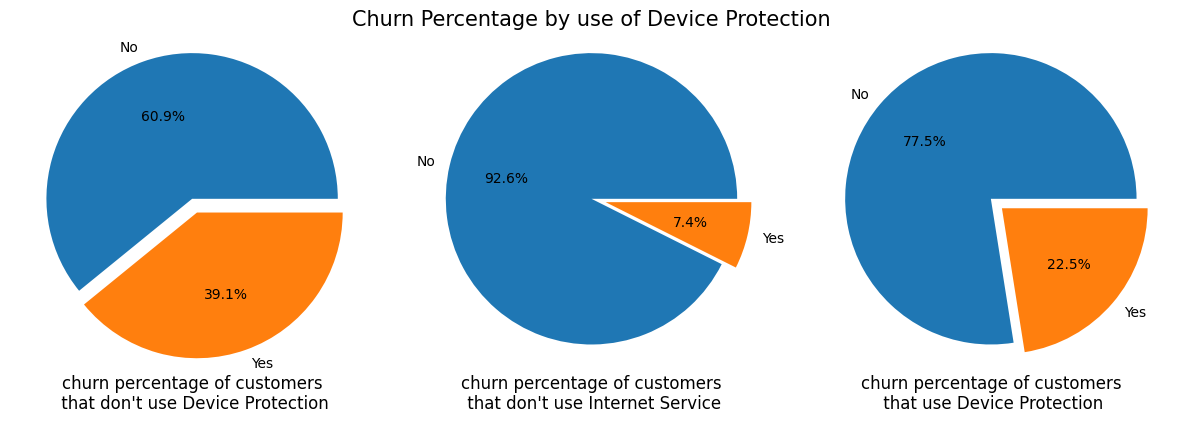

In [46]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

for i,status in enumerate(protection['DeviceProtection'].unique()):
    sub=protection[protection['DeviceProtection']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f'churn percentage of customers\n that use Device Protection',y=-0.1)
    elif status=='No':
        ax[i].set_title(f'churn percentage of customers\n that don\'t use Device Protection',y=-0.1)
    else:
        ax[i].set_title(f'churn percentage of customers\n that don\'t use Internet Service',y=-0.1)
        
plt.tight_layout()    
plt.suptitle('Churn Percentage by use of Device Protection',size=15)
plt.show()

In [47]:
use_protection=protection[(protection['DeviceProtection']=='Yes') & (protection['Churn']=='Yes')].Count.item()
no_protection=protection[(protection['DeviceProtection']=='No') & (protection['Churn']=='Yes')].Count.item()
total=protection.Count.sum()
print(f'{use_protection} Customers that use device protection churned. Equivalent to {round(100*use_protection/total,2)}% of our total customers')
print(f'{no_protection} Customers that don\'t use device protection churned. Equivalent to {round(100*no_protection/total,2)}% of our total customers')

545 Customers that use device protection churned. Equivalent to 7.74% of our total customers
1211 Customers that don't use device protection churned. Equivalent to 17.19% of our total customers


#### customers that don't use device protection had the highest churn percentage.

## Let's explore further to check if there is any relationship between the Internet Service used and device protection if they don't use device protection

In [48]:
unprotected_internet=df[df['DeviceProtection']=='No'].groupby(['InternetService','Churn']).size().reset_index(name='Count')
unprotected_internet

,InternetService,Churn,Count
0,DSL,No,1014
1,DSL,Yes,342
2,Fiber optic,No,870
3,Fiber optic,Yes,869


In [49]:
use_unprotected_dsl=unprotected_internet[(unprotected_internet['InternetService']=='DSL') & \
                                     (unprotected_internet['Churn']=='Yes')].Count.item()
use_unprotected_fiber=unprotected_internet[(unprotected_internet['InternetService']=='Fiber optic') & \
                                       (unprotected_internet['Churn']=='Yes')].Count.item()
total=unprotected_internet.Count.sum()
print(f'{use_unprotected_dsl} Customers without device protection that use DSL churned. Equivalent to \
{round(100*use_unprotected_dsl/total,2)}% of our total customers with no device protection')
print(f'{use_unprotected_fiber} Customers without device protection that use Fiber optic churned. Equivalent to \
{round(100*use_unprotected_fiber/total,2)}% of our total customers with no device protection')

342 Customers without device protection that use DSL churned. Equivalent to 11.05% of our total customers with no device protection
869 Customers without device protection that use Fiber optic churned. Equivalent to 28.08% of our total customers with no device protection


#### It can also be seen that majority of the customers that churned due to not using online backup are also  Fiber optic Internet Service user

## Explore Tech Support

In [50]:
support=df.groupby(['TechSupport','Churn']).size().reset_index(name='Count')
support

,TechSupport,Churn,Count
0,No,No,2027
1,No,Yes,1446
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1734
5,Yes,Yes,310


## Visualize

In [ ]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

for i,status in enumerate(support['TechSupport'].unique()):
    sub=support[support['TechSupport']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f'churn percentage of customers\n that use Tech Support',y=-0.1)
    elif status=='No':
        ax[i].set_title(f'churn percentage of customers\n that don\'t use Tech Support',y=-0.1)
    else:
        ax[i].set_title(f'churn percentage of customers\n that don\'t use Internet Service',y=-0.1)
        
plt.tight_layout()    
plt.suptitle('Churn Percentage by use of Tech Protection',size=15)
plt.show()

In [ ]:
use_support=support[(support['TechSupport']=='Yes') & (support['Churn']=='Yes')].Count.item()
no_support=support[(support['TechSupport']=='No') & (support['Churn']=='Yes')].Count.item()
total=support.Count.sum()
print(f'{use_support} Customers that use Tech Support churned. Equivalent to {round(100*use_support/total,2)}% of our total customers')
print(f'{no_support} Customers that don\'t use Tech Support churned. Equivalent to {round(100*no_support/total,2)}% of our total customers')

#### customers that don't use device protection had the highest churn percentage.

## Let's explore further to check if there is any relationship between the Internet Service used and device protection if they don't use device protection

In [ ]:
no_support=df[df['TechSupport']=='No'].groupby(['InternetService','Churn']).size().reset_index(name='Count')
no_support

In [ ]:
no_support_dsl=no_support[(no_support['InternetService']=='DSL') & \
                                     (no_support['Churn']=='Yes')].Count.item()
no_support_fiber=no_support[(no_support['InternetService']=='Fiber optic') & \
                                       (no_support['Churn']=='Yes')].Count.item()
total=unprotected_internet.Count.sum()
print(f'{no_support_dsl} Customers without device protection that use DSL churned. Equivalent to \
{round(100*no_support_dsl/total,2)}% of our total customers with no device protection')
print(f'{no_support_fiber} Customers without device protection that use Fiber optic churned. Equivalent to \
{round(100*no_support_fiber/total,2)}% of our total customers with no device protection')

#### It can also be seen that majority of the customers that churned due to not using device protection are also  Fiber optic Internet Service user

## Explore Streaming TV

In [ ]:
stream_tv=df.groupby(['StreamingTV','Churn']).size().reset_index(name='Count')
stream_tv

## Visualize

In [ ]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

for i,status in enumerate(stream_tv['StreamingTV'].unique()):
    sub=stream_tv[stream_tv['StreamingTV']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f'churn percentage of customers\n that stream TV',y=-0.1)
    elif status=='No':
        ax[i].set_title(f'churn percentage of customers\n that don\'t stream TV',y=-0.1)
    else:
        ax[i].set_title(f'churn percentage of customers\n that don\'t use Internet Service',y=-0.1)
        
plt.tight_layout()    
plt.suptitle('Churn Percentage by TV Streaming',size=15)
plt.show()

In [ ]:
stream_tv_yes=stream_tv[(stream_tv['StreamingTV']=='Yes') & (stream_tv['Churn']=='Yes')].Count.item()
stream_tv_no=stream_tv[(stream_tv['StreamingTV']=='No') & (stream_tv['Churn']=='Yes')].Count.item()
total=stream_tv.Count.sum()
print(f'{stream_tv_yes} Customers that stream TV churned. Equivalent to {round(100*stream_tv_yes/total,2)}% of our total customers')
print(f'{stream_tv_no} Customers that don\'t stream TV churned. Equivalent to {round(100*stream_tv_no/total,2)}% of our total customers')

#### The churn percentage for whether they stream tv or not had no much difference

## Explore Streaming Movie

In [ ]:
stream_movie=df.groupby(['StreamingMovies','Churn']).size().reset_index(name='Count')
stream_movie

## Visualize 

In [ ]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

for i,status in enumerate(stream_movie['StreamingMovies'].unique()):
    sub=stream_movie[stream_movie['StreamingMovies']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f'churn percentage of customers\n that stream movies',y=-0.1)
    elif status=='No':
        ax[i].set_title(f'churn percentage of customers\n that don\'t stream movies',y=-0.1)
    else:
        ax[i].set_title(f'churn percentage of customers\n that don\'t use Internet Service',y=-0.1)
        
plt.tight_layout()    
plt.suptitle('Churn Percentage by Movies Streaming ',size=15)
plt.show()

In [ ]:
stream_movie_yes=stream_movie[(stream_movie['StreamingMovies']=='Yes') & (stream_movie['Churn']=='Yes')].Count.item()
stream_movie_no=stream_movie[(stream_movie['StreamingMovies']=='No') & (stream_movie['Churn']=='Yes')].Count.item()
total=support.Count.sum()
print(f'{stream_movie_yes} Customers that use Tech Support churned. Equivalent to {round(100*stream_movie_yes/total,2)}% of our total customers')
print(f'{stream_movie_no} Customers that don\'t use Tech Support churned. Equivalent to {round(100*stream_movie_no/total,2)}% of our total customers')

#### The churn percentage for whether they stream movies or not had no much difference

## Explore Contract

In [ ]:
contract=df.groupby(['Contract','Churn']).size().reset_index(name='Count')
contract

## Visualize

In [ ]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

for i,status in enumerate(contract['Contract'].unique()):
    sub=contract[contract['Contract']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    ax[i].set_title(f'churn percentage of customers\n with {status} Contract',y=-0.1)
        
plt.tight_layout()    
plt.suptitle('Churn Percentage by Contract Type ',size=15)
plt.show()

In [ ]:
monthly=contract[(contract['Contract']=='Month-to-month') & (internet['Churn']=='Yes')].Count.item()
one_year=contract[(contract['Contract']=='One year') & (internet['Churn']=='Yes')].Count.item()
two_year=contract[(contract['Contract']=='Two year') & (internet['Churn']=='Yes')].Count.item()
total=contract.Count.sum()

print(f'{monthly} Customers that are on Month-to-month Contract churned. Equivalent to {round(100*monthly/total,2)}% of our total customers')
print(f'{one_year} Customers that are on One year Contract churned. Equivalent to {round(100*one_year/total,2)}% of our total customers')
print(f'{two_year} Customers that are on Two years Contract churned. Equivalent to {round(100*two_year/total,2)}% of our total customers')


In [ ]:
df.groupby(['Contract']).size().plot(kind='pie',ylabel='',autopct='%.2f%%',title='Contract Distribution',
                                            explode=[0,0.03,0])

#### This shows that customers on a monthly contract churned more. This is most likely because it is easier for them to move to other telecommunication network after a short period contract. It is also to be noted that it carries a majority of our total customers

## Explore paperless billing

In [ ]:
billing=df.groupby(['PaperlessBilling','Churn']).size().reset_index(name='Count')
billing



In [ ]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(12,4))

for i,status in enumerate(billing['PaperlessBilling'].unique()):
    sub=billing[billing['PaperlessBilling']==status]
    ax[i].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.1], autopct='%.1f%%')
    if status=='Yes':
        ax[i].set_title(f'Paperless Billing churn percentage',y=-0.05)
    else:
        ax[i].set_title(f'Paper Billing churn percentage',y=-0.05)
    
plt.suptitle('Churn Percentage by Billing',size=15)
plt.show()


In [ ]:
paperless_billing=billing[(billing['PaperlessBilling']=='Yes') & (billing['Churn']=='Yes')].Count.item()
paper_billing=billing[(billing['PaperlessBilling']=='No') & (billing['Churn']=='Yes')].Count.item()
total=billing.Count.sum()
print(f'{paperless_billing} customers using Paperless Billing churned. Equivalent to {round(100*paperless_billing/total,2)}% of our total customers')
print(f'{paper_billing} customers using Paperless Billing churned. Equivalent to {round(100*paper_billing/total,2)}% of our total customers')

#### A higher percentage of customers that churned used the Paperless Billing.

## Explore Payment method

In [ ]:
payment=df.groupby(['PaymentMethod','Churn']).size().reset_index(name='Count')
payment

In [ ]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(12,6))

for i,status in enumerate(payment['PaymentMethod'].unique()):
    sub=payment[payment['PaymentMethod']==status]
    row=i//2
    col=i%2
    ax[row][col].pie(x=sub['Count'],labels=sub['Churn'],explode=[0,0.05], autopct='%.1f%%')
    ax[row][col].set_title(f'{status} Payment Method',y=-0.05)
    
plt.suptitle('Churn Percentage by Payment Method',size=15)
plt.tight_layout()
plt.show()


#### Customers that made use of Electronic Check for payment churned more

## View relationship between the continuous data in dataset

In [ ]:
plt.figure(figsize=(30,15))
sns.pairplot(data=df,hue='Churn',plot_kws={'alpha':0.3})

#### From the pairplot, it can be deduced that: 
* customers are more likely to churn depending on how new they are to our service, as customers with lower tenure had higher churn density
* customers with monthly charges around \\$70 to \\$110 churned more
* customers with total charges around \\$0 to \\$1000 churned more

In [ ]:
charge=df[['MonthlyCharges','TotalCharges','tenure','Churn']].groupby(['Churn']).mean().round(2)
charge['tenure']=charge['tenure'].apply(round)
charge

#### Customers that churned had an average monthly charge of \\$74.44 and a Total Charge with an average of \\$1531.80 over an average tenure of 18 month where as for those that didn't churn they had an average monthly charge of \\$61.27 with a Total Charge  average of \\$2549.91 over an average tenure of 38 months. Our customer's are leaving because of the monthly charged offered. Also it should be noted that they are mostly new customers.



In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df,x='MonthlyCharges',y='tenure',hue='InternetService',alpha=0.7)
plt.legend(loc=(1.01,0))
plt.title('Monthly Charge vs Tenure for Internet Service')

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df,x='MonthlyCharges',y='tenure',hue='PhoneService',alpha=0.7)
plt.legend(loc=(1.01,0))
plt.title('Monthly Charge vs Tenure for Phone Service')

# SUMMARY

## Problems:
1. **Price Sensitivity**: Customers churned majorly due to price concerns. The cost of services offered by Telco is a significant factor influencing customer decisions to stay or leave.

2. **Service Utilization**: Customers who use multiple services (phone and internet) are more likely to be affected by price changes, potentially leading to higher churn rates.

3. **Dependents and Partners**: Customers with partners or dependents are less likely to churn since they find the Telco service more essential for communication.

4. **Senior Citizens vs. Non-Senior Citizens**: While senior citizens have a higher churn rate compared to their total number, non-senior citizens contribute more to the overall churn due to their larger share of the customer base.

5. **Internet Service and Add-ons**: Customers might not be fully aware of or appreciate the value of add-ons like online security, backup, and device protection, leading to higher churn rates.

6. **Electronic Check Payment Method**: Issues with the electronic check payment method might be affecting customer satisfaction and contributing to churn.

7. **Long-Term Contracts**: Customers on short-term contracts are more likely to churn, necessitating strategies to encourage long-term contracts.

8. **DSL Internet Service**: Customers using Fiber Optic Internet Service might be more prone to churn due to its higher cost, which could be mitigated by suggesting DSL internet service.

9. **Paperless Billing**: Problems with paperless billing might lead to unnecessary charges or confusion among customers, impacting churn rates.

## Recommended Solutions:
1. **Price Sensitivity**: Explore options to lower prices for certain service packages while retaining high-quality offerings. Conduct market research to determine competitive pricing strategies and adjust pricing plans accordingly.

2. **Service Utilization**: Offer flexible service packages tailored to individual customer needs, allowing customers to customize their plans and pay only for the services they actually use.

3. **Dependents and Partners**: Implement customer loyalty programs or special incentives for customers with dependents or partners to encourage long-term engagement and reduce churn.

4. **Senior Citizens vs. Non-Senior Citizens**: Focus on improving services specifically targeted at senior citizens to address their needs and enhance customer retention in this segment.

5. **Internet Service and Add-ons**: Conduct targeted marketing campaigns to educate customers about the benefits of add-ons like online security, backup, and device protection. Offer trial periods for add-ons to encourage adoption.

6. **Electronic Check Payment Method**: Investigate and address issues with the electronic check payment method, including streamlining the payment process and providing customer support for payment-related concerns.

7. **Long-Term Contracts**: Offer discounts or additional benefits for customers who choose long-term contracts. Emphasize the advantages of committing to long-term plans, such as price stability and exclusive perks.

8. **DSL Internet Service**: Identify customers using Fiber Optic Internet Service who might be willing to switch to DSL internet service due to cost considerations. Offer incentives for the transition.

9. **Paperless Billing**: Improve the paperless billing system to ensure accuracy and transparency. Provide clear billing information and options for customers to manage their billing preferences easily.

By implementing these recommended solutions, Telco can effectively address the identified problems and work towards reducing customer churn and improving overall customer satisfaction and retention.
